<a href="https://colab.research.google.com/github/yassine-grati/rememberme/blob/main/pcd5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [2]:
import pandas as pd

dataset_1 = pd.read_csv("/content/alzheimer.csv")
dataset_2 = pd.read_csv("/content/alzheimers_disease_data.csv")
dataset_3 = pd.read_csv("/content/oasis_cross-sectional.csv")
dataset_4 = pd.read_csv("/content/oasis_longitudinal.csv")

# Affiche les premières lignes pour un aperçu
print(dataset_1.head())
print(dataset_2.head())
print(dataset_3.head())
print(dataset_4.head())


         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2     Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3     Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4     Demented   M   80    12  NaN  22.0  0.5  1698  0.701  1.034
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...           

In [3]:

print(len(dataset_2))


2149


In [4]:
print("Colonnes dataset_1 (alzheimer.csv) :")
print(dataset_1.columns)

print("\nColonnes dataset_2 (alzheimers_disease_data.csv) :")
print(dataset_2.columns)

print("\nColonnes dataset_3 (oasis_cross-sectional.csv) :")
print(dataset_3.columns)

print("\nColonnes dataset_4 (oasis_longitudinal.csv) :")
print(dataset_4.columns)


Colonnes dataset_1 (alzheimer.csv) :
Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

Colonnes dataset_2 (alzheimers_disease_data.csv) :
Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

Colonnes dataset_3 (oasis_cross-sectional.csv) :
Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
     

In [5]:

import pandas as pd


# Sélectionner les colonnes pertinentes + la cible (Diagnosis)
selected_columns = [
    'Age',
    'Gender',
    'EducationLevel',
    'PhysicalActivity',
    'SleepQuality',
    'FamilyHistoryAlzheimers',
    'Diabetes',
    'MMSE',
    'Diagnosis'  # 🎯 notre sortie à prédire
]

# Créer le DataFrame
dataset_model = dataset_2[selected_columns]

# Aperçu
print(dataset_model.head())

# Vérifier les valeurs manquantes
print(dataset_model.isnull().sum())

# Si valeurs manquantes => remplir ou supprimer (ici on supprime pour l'exemple)
dataset = dataset_model.dropna()


   Age  Gender  EducationLevel  PhysicalActivity  SleepQuality  \
0   73       0               2          6.327112      9.025679   
1   89       0               0          7.619885      7.151293   
2   73       0               1          7.844988      9.673574   
3   74       1               1          8.428001      8.392554   
4   89       0               0          6.310461      5.597238   

   FamilyHistoryAlzheimers  Diabetes       MMSE  Diagnosis  
0                        0         1  21.463532          0  
1                        0         0  20.613267          0  
2                        1         0   7.356249          0  
3                        0         0  13.991127          0  
4                        0         0  13.517609          0  
Age                        0
Gender                     0
EducationLevel             0
PhysicalActivity           0
SleepQuality               0
FamilyHistoryAlzheimers    0
Diabetes                   0
MMSE                       0
Diagn

In [6]:
# Séparer les features (X) et la cible (y)
X = dataset_model.drop('Diagnosis', axis=1)
y = dataset_model['Diagnosis']

print(X.shape)
print(y.shape)


(2149, 8)
(2149,)


In [7]:
# prompt: I WANT TO KNOW THE VALUES OF MY FEATURE AGE IN MY DATASET_MODEL VRIE ENTRE QUOI ET QUOI ?

print(dataset_model['Age'].min())
print(dataset_model['Age'].max())


60
90


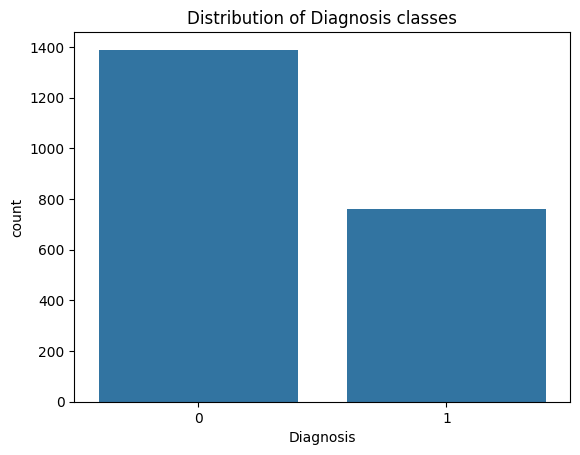

Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Répartition de la cible (Diagnosis)
sns.countplot(x='Diagnosis', data=dataset_model)
plt.title('Distribution of Diagnosis classes')
plt.show()

# Afficher le pourcentage de chaque classe
print(dataset_model['Diagnosis'].value_counts(normalize=True) * 100)


In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline# === 4. Splitter en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Before SMOTE — train shape:", X_train.shape, y_train.shape)
print("Before SMOTE — test shape: ", X_test.shape, y_test.shape)

# 5. Appliquer SMOTE UNIQUEMENT sur le jeu d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE  — train shape:", X_train_res.shape, y_train_res.shape)


# === 5. Normaliser les données ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)
print("le head de x-train apres normalisation de donees")
# Convert X_train_scaled back to DataFrame to use .head()
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_res.columns)
print(X_train_scaled_df.head()) # Using .head() on the DataFrame

print("le head de x-test apres normalisation de donees")
# Convert X_test_scaled back to DataFrame to use .head()
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_test_scaled_df.head()) # Using .head() on the DataFrame

print("le head de y_train_res apres normalisation de donees")
print(y_train_res.head())
print("le head de y_test apres normalisation de donees")
print(y_test.head())


# === 6. Dataset prêt pour Machine Learning ! ===
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Before SMOTE — train shape: (1719, 8) (1719,)
Before SMOTE — test shape:  (430, 8) (430,)
After SMOTE  — train shape: (2222, 8) (2222,)
le head de x-train apres normalisation de donees
        Age    Gender  EducationLevel  PhysicalActivity  SleepQuality  \
0  1.256201 -0.884238       -0.235126          0.570962      1.517379   
1 -1.405645  1.130917        2.046316         -1.070725     -1.144438   
2  0.036188 -0.884238       -1.375847          1.641401      0.547740   
3  1.588932 -0.884238       -1.375847         -1.280647      1.309618   
4  0.147098  1.130917        0.905595          1.196509     -0.627479   

   FamilyHistoryAlzheimers  Diabetes      MMSE  
0                 1.957150 -0.376602  0.781180  
1                -0.510947 -0.376602 -0.607657  
2                -0.510947  2.655320 -0.250163  
3                -0.510947 -0.376602  1.621181  
4                -0.510947  2.655320  1.354029  
le head de x-test apres normalisation de donees
        Age    Gender  EducationLe

In [11]:
from google.colab import drive


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import joblib
drive.mount('/content/drive')

# === 1. Sélection de features importantes avec XGBoost initial ===
xgb_temp = XGBClassifier(random_state=42)
xgb_temp.fit(X, y)
feature_importances = pd.Series(xgb_temp.feature_importances_, index=X.columns)
selected_features = feature_importances[feature_importances > 0].index.tolist()

# === 2. Réduction des données aux features importantes ===
X_selected = X[selected_features]

# === 3. Split train/test stratifié ===
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)
print("Before SMOTE — train shape:", X_train.shape, y_train.shape)
print("Before SMOTE — test shape: ", X_test.shape, y_test.shape)

# === 4. Appliquer SMOTE sur le train uniquement ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE — train shape:", X_train_res.shape, y_train_res.shape)

# === 5. Standardisation ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# === 6. Entraînement du modèle XGBoost final ===
xgb_final = XGBClassifier(random_state=42)
xgb_final.fit(X_train_scaled, y_train_res)

# === 7. Prédictions sur le jeu de test ===
y_pred = xgb_final.predict(X_test_scaled)

# === 8. Affichage de la matrice de confusion et des métriques ===
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Affichage
print("\n=== Model Evaluation Summary ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")

print("\nConfusion Matrix:")
print(cm)
# 10. Enregistrer le modèle, le scaler et les features sélectionnées dans Google Drive
drive_path = '/content/drive/MyDrive/models/'
# (créer le dossier si besoin)
import os
os.makedirs(drive_path, exist_ok=True)

joblib.dump(xgb_final,  drive_path + 'xgb_final.joblib')
joblib.dump(scaler,    drive_path + 'scaler.joblib')
joblib.dump(selected_features, drive_path + 'selected_features.joblib')

print(f"\nModèle et artefacts enregistrés dans : {drive_path}")

Mounted at /content/drive
Before SMOTE — train shape: (1719, 8) (1719,)
Before SMOTE — test shape:  (430, 8) (430,)
After SMOTE — train shape: (2222, 8) (2222,)

=== Model Evaluation Summary ===
Accuracy : 0.6326
F1 Score : 0.6037
Recall   : 0.6055
Precision: 0.6027

Confusion Matrix:
[[194  84]
 [ 74  78]]

Modèle et artefacts enregistrés dans : /content/drive/MyDrive/models/


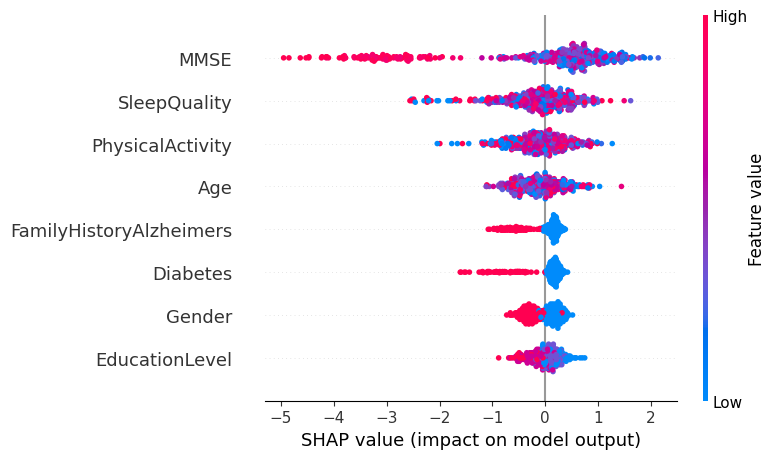

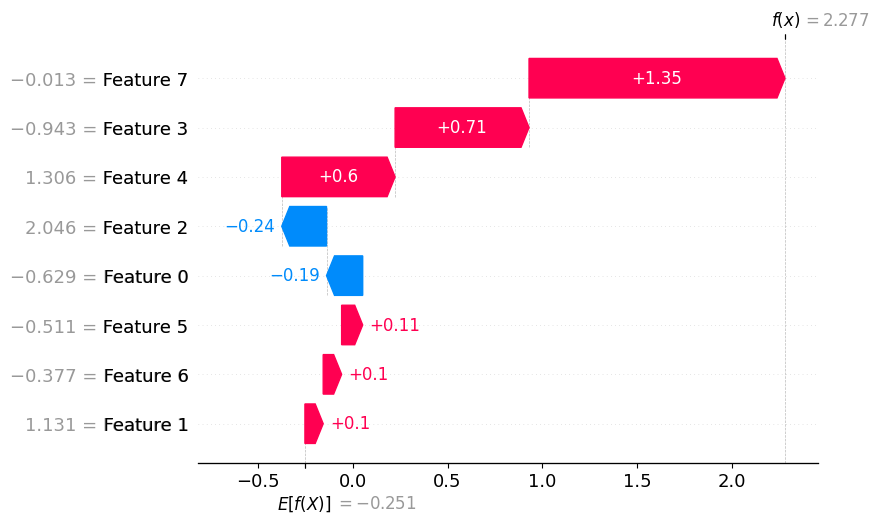

In [12]:
!pip install shap
import shap

# Create explainer for XGBoost
explainer = shap.Explainer(xgb_final, X_train_scaled)

# Explique les prédictions sur le jeu de test
shap_values = explainer(X_test_scaled)

# Résumé visuel de l’importance des features
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

# Pour une seule prédiction (ex: la 1ère)
shap.plots.waterfall(shap_values[0])


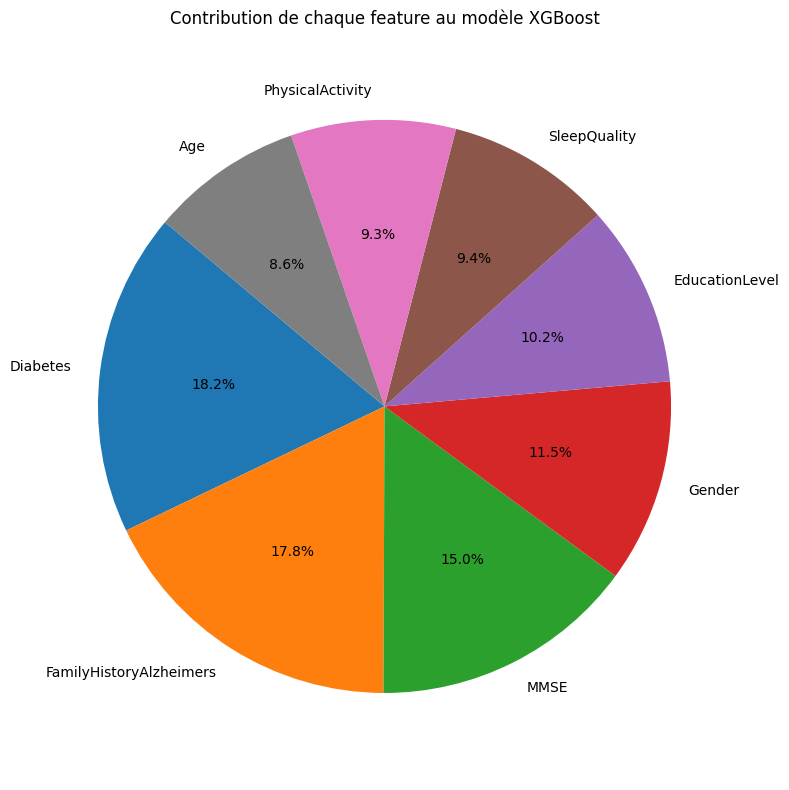

In [13]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd

# Charger les importances des features depuis un modèle XGBoost
model = joblib.load("/content/drive/MyDrive/models/xgb_final.joblib")
selected_features = joblib.load("/content/drive/MyDrive/models/selected_features.joblib")

# Obtenir les importances des features
importances = model.feature_importances_
importances_series = pd.Series(importances, index=selected_features).sort_values(ascending=False)

# Tracer un diagramme en secteurs (camembert)
plt.figure(figsize=(8, 8))
plt.pie(importances_series, labels=importances_series.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution de chaque feature au modèle XGBoost')
plt.axis('equal')  # Assure que le camembert est rond
plt.tight_layout()
plt.show()
